## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.model_selection import train_test_split

## Load Data

In [2]:
pd.set_option('display.max_columns', None)

data = pd.read_csv('../data/travel.xls', delimiter=",", engine="python")
data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


### Data Understanding

In [3]:
print (f'Data shape: {data.shape}')

Data shape: (4888, 20)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

### Check and Fix Data (if necessary)

In [5]:
#check objects data dtypes
categorical_columns = data.select_dtypes(include='object')
for columns in categorical_columns:
  print(data[columns].value_counts())
  print('====================')

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64
Occupation
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: count, dtype: int64
Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64
ProductPitched
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: count, dtype: int64
MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64
Designation
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: count, dtype: int64


In [6]:
#fix gender column
data['Gender'] = data['Gender'].apply(lambda x: 'Female' if x == 'Fe Male' else x)

In [7]:
#change object data type to categorical
data['TypeofContact'] = pd.Categorical(
    data['TypeofContact'], categories=['Self Enquiry', 'Company Invited'], ordered = False
    )

data['Occupation'] = pd.Categorical(
    data['Occupation'], categories=['Free Lancer', 'Salaried', 'Small Business', 'Large Business'], ordered = True
    )

data['Gender'] = pd.Categorical(
    data['Gender'], categories=['Male', 'Female'], ordered = False
    )

data['ProductPitched'] = pd.Categorical(
    data['ProductPitched'], categories=['Basic', 'Standard', 'Deluxe', 'Super Deluxe', 'King'], ordered = True
    )

data['MaritalStatus'] = pd.Categorical(
    data['MaritalStatus'], categories=['Unmarried', 'Single', 'Divorced', 'Married'], ordered = False
    )

data['Designation'] = pd.Categorical(
    data['Designation'], categories=['Executive', 'Manager', 'Senior Manager', 'AVP', 'VP'], ordered = True
    )

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'DurationOfPitch'}>],
       [<Axes: title={'center': 'NumberOfTrips'}>,
        <Axes: title={'center': 'MonthlyIncome'}>]], dtype=object)

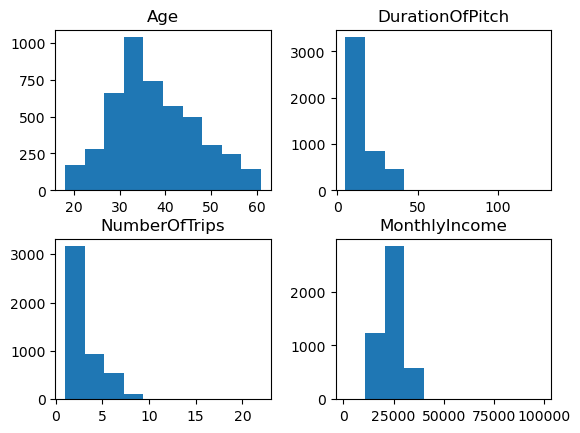

In [9]:
data[['Age','DurationOfPitch', 'NumberOfTrips','MonthlyIncome']].hist(grid=False)

**Observations:**

- Minimum `Age` is 18, while maximum is 61, seems to be normally distributed.
- There may be outliers in the `DurationOfPitch`, `NumberOfTrips`, and `MonthlyIncome` columns that will need to be dealt with later.

### Handle Duplicated Data

In [10]:
#Check ratio of unique values
len(data.drop_duplicates(subset = ['CustomerID'])) / len(data)

1.0

In [11]:
duplicates = data[data.duplicated(keep=False)]
duplicates

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome


There are no duplicates found.

In [12]:
# Final Data Check
print (f'Data shape: {data.shape}')

Data shape: (4888, 20)


## Data Cleaning_EDA

In [15]:
data_eda = data.copy()

### Handle Missing Data

In [19]:
#check missing values
missing_eda = data_eda.isnull().sum().reset_index()
missing_eda.columns = ['features', 'missing_values']
missing_eda['percentage'] = (missing_eda['missing_values']/len(data_eda)) *100
missing_eda

,features,missing_values,percentage
0,CustomerID,0,0.000000
1,ProdTaken,0,0.000000
2,Age,226,4.623568
3,TypeofContact,25,0.511457
4,CityTier,0,0.000000
5,DurationOfPitch,251,5.135025
6,Occupation,0,0.000000
7,Gender,0,0.000000
8,NumberOfPersonVisiting,0,0.000000
9,NumberOfFollowups,45,0.920622


Since the percentage of missing data is still less than 20%, non of the columns will be dropped. But rather, data will be imputed. The missing data pattern will be analyzed first. If the missing values appear randomly scattered without a clear pattern, it suggests the data is Missing Completely at Random (MCAR). If there are noticeable patterns or correlations with other features, the missingness is likely Missing at Random (MAR) or Not Missing at Random (NMAR), indicating that the missingness is related to observed or unobserved data. The missing values will then be imputed accordingly.

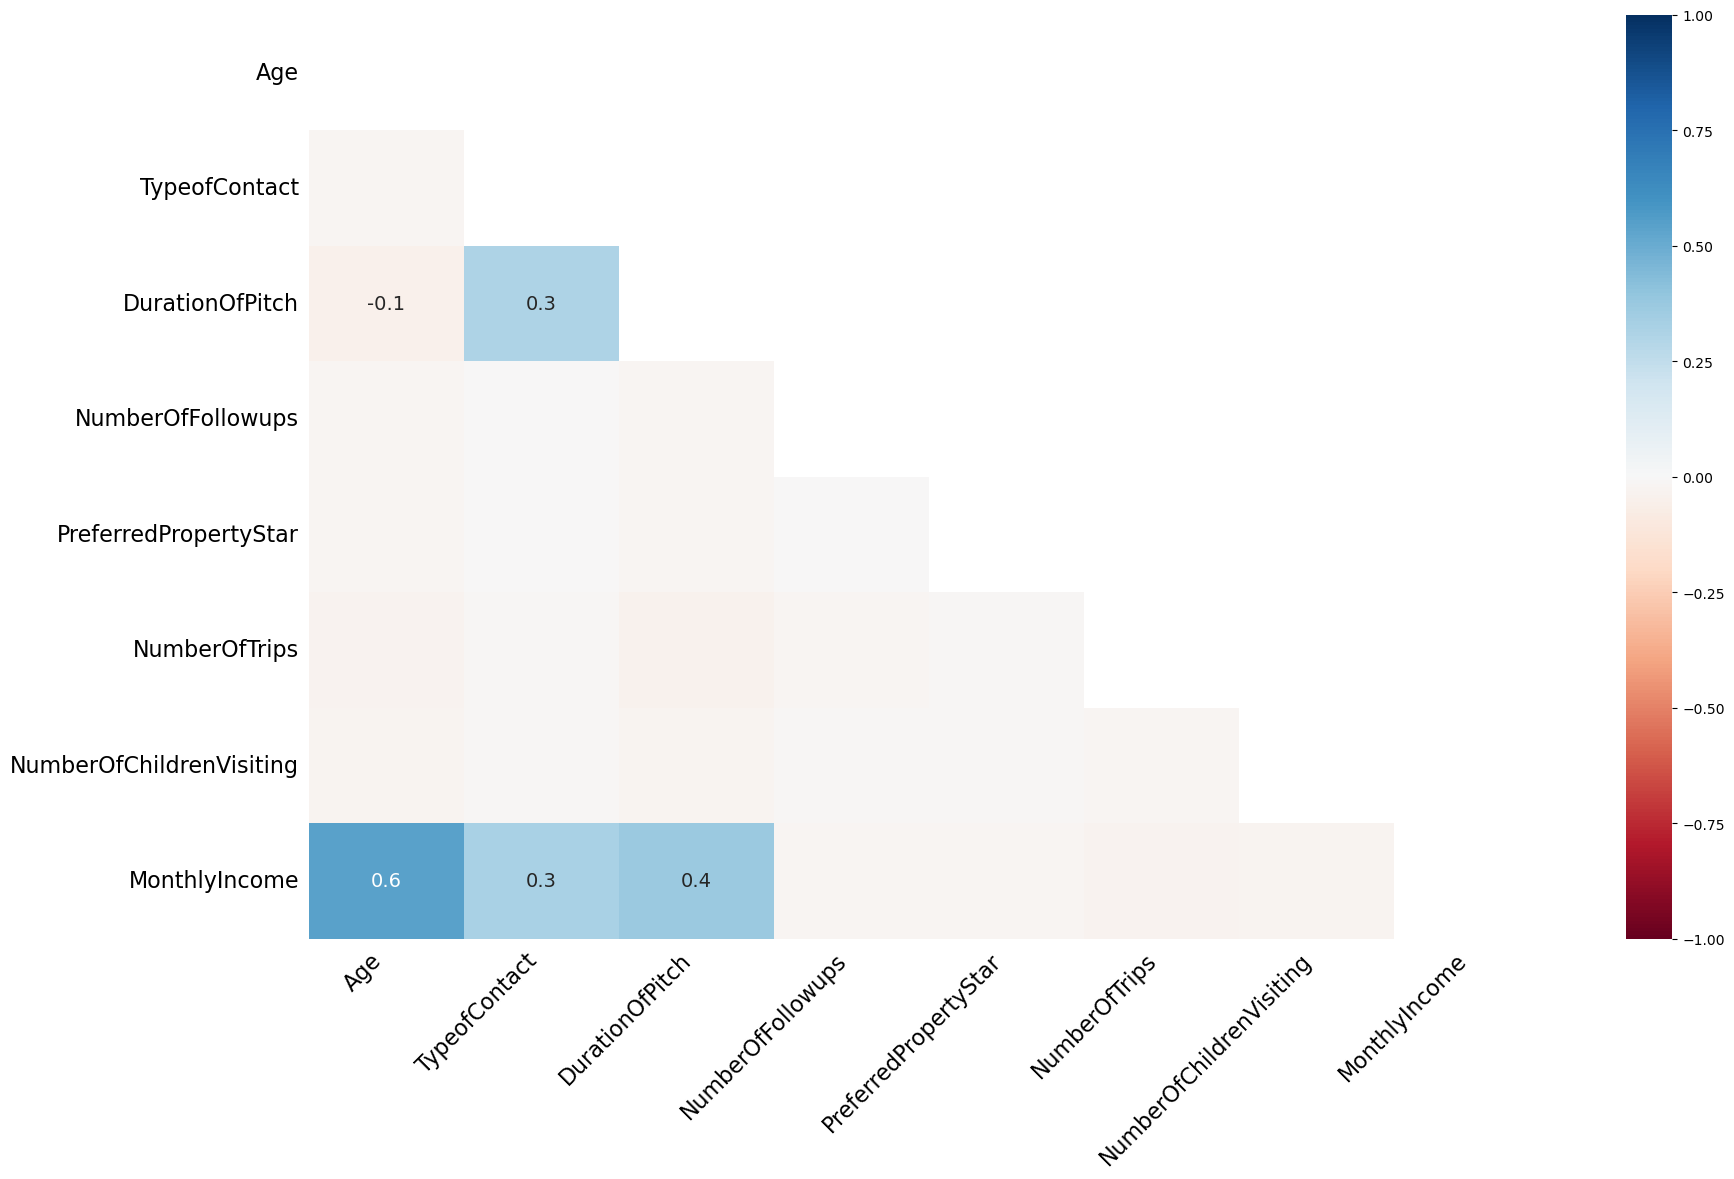

In [25]:
msno.heatmap(data_eda)
plt.show()

Based the heatmap, the missing data seems to be MAR - not completely random - since some columns show moderate correlations of missing values (.e.g. `MonthlyIncome` with  `Age`, `TypeofContact`, and `DurationOfPitch`). Multiple Imputation by chained Equations (MICE) imputaion method will be used here to handle the missing data.

- The columns `NumberOfFollowups` and `NumberOfChildrenVisiting` will be imputed with 0, as they possibly indicate that no follow ups were made and no children were traveling. Moreover, there is no correlation between the missing values.
-  The columns `PreferredPropertyStar` will be imputed with mode, while the `NumberOfTrips` column will be imputed with median since there is a low percentage of missing values, and weak or no correlation.
-  The other columns (`Age`, `TypeofContact`, `DurationOfPitch`, and `MonthlyIncome`) will be imputed with MICE since there is strong correlation between other variables.

In [33]:
data_filled = data_eda.copy()

#fill missing columns with 0
data_filled['NumberOfFollowups'] = data_filled['NumberOfFollowups'].fillna(0)
data_filled['NumberOfChildrenVisiting'] = data_filled['NumberOfChildrenVisiting'].fillna(0)

#fill missing columns with mode or median
data_filled['PreferredPropertyStar'] = data_filled['PreferredPropertyStar'].fillna(data_eda['PreferredPropertyStar'].mode()[0])

data_filled['NumberOfTrips'] = data_filled['NumberOfTrips'].fillna(data_eda['NumberOfTrips'].median())

In [35]:
#MICE Imputation
from miceforest import ImputationKernel

mice_kernel = ImputationKernel(
    data = data_filled,
    random_state = 42)

mice_kernel.mice(5)
data_filled = mice_kernel.complete_data()
data_filled.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,34.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [36]:
check_missing = data_filled.isnull().sum().reset_index()
check_missing.columns = ['features', 'missing_values']
check_missing['percentage'] = (check_missing['missing_values']/len(data)) *100
check_missing

,features,missing_values,percentage
0,CustomerID,0,0.0
1,ProdTaken,0,0.0
2,Age,0,0.0
3,TypeofContact,0,0.0
4,CityTier,0,0.0
5,DurationOfPitch,0,0.0
6,Occupation,0,0.0
7,Gender,0,0.0
8,NumberOfPersonVisiting,0,0.0
9,NumberOfFollowups,0,0.0


## Data Manipulation_EDA

- The `Age` and `MonthlyIncome` columns can be grouped for easier visualizations and interpretation

In [18]:
#data_filled['Age'].hist(bins=15, grid=False)

In [68]:
#"bin" continuous variables into groups - Age into AgeGroup
data_filled['AgeGroup'] = pd.cut(data_filled['Age'], bins = [0, 20, 30, 40, 50, 70],
                           labels = ['<20','20-30', '31-40', '41-50', '51+'])

In [20]:
#data_filled['MonthlyIncome'].hist(bins=15, grid=False)

In [69]:
#"bin" continuous variables into groups - Income into IncomeGroup
data_filled['IncomeGroup'] = pd.cut(data_filled['MonthlyIncome'], bins = [0, 20000, 25000, 30000, 35000, 40000, float('inf')],
                            labels = ['<20000', '20000-25000', '25000-30000', '30000-35000', '35000-40000', '40000+'])

In [70]:
data_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CustomerID                4888 non-null   int64   
 1   ProdTaken                 4888 non-null   int64   
 2   Age                       4888 non-null   float64 
 3   TypeofContact             4888 non-null   category
 4   CityTier                  4888 non-null   int64   
 5   DurationOfPitch           4888 non-null   float64 
 6   Occupation                4888 non-null   category
 7   Gender                    4888 non-null   category
 8   NumberOfPersonVisiting    4888 non-null   int64   
 9   NumberOfFollowups         4888 non-null   float64 
 10  ProductPitched            4888 non-null   category
 11  PreferredPropertyStar     4888 non-null   float64 
 12  MaritalStatus             4888 non-null   category
 13  NumberOfTrips             4888 non-null   float6

In [71]:
print(f'Data Shape: {data_filled.shape}')

Data Shape: (4888, 22)


In [72]:
data_filled.to_csv('../data/travel_cleaned.csv', index=False)

## Data Cleaning_Machine Learning

In [13]:
data_ml = data.copy()

In [ ]:
# Split the data into training and testing sets
train_df, test_df = train_test_split(data_ml, test_size = 0.2, random_state=42)

### Handle Missing Data for Training Set

In [22]:
#check missing values in training data
missing_ml = train_df.isnull().sum().reset_index()
missing_ml.columns = ['features', 'missing_values']
missing_ml['percentage'] = (missing_ml['missing_values']/len(train_df)) *100
missing_ml

,features,missing_values,percentage
0,CustomerID,0,0.000000
1,ProdTaken,0,0.000000
2,Age,173,4.424552
3,TypeofContact,21,0.537084
4,CityTier,0,0.000000
5,DurationOfPitch,218,5.575448
6,Occupation,0,0.000000
7,Gender,0,0.000000
8,NumberOfPersonVisiting,0,0.000000
9,NumberOfFollowups,30,0.767263


Method of imputation used is be similar to EDA but with train and test set.

In [39]:
# Fill training data missing values
train_filled = train_df.copy().reset_index(drop=True)

#fill missing columns with 0
train_filled['NumberOfFollowups'] = train_filled['NumberOfFollowups'].fillna(0)
train_filled['NumberOfChildrenVisiting'] = train_filled['NumberOfChildrenVisiting'].fillna(0)

#fill missing columns with mode or median
train_filled['PreferredPropertyStar'] = train_filled['PreferredPropertyStar'].fillna(train_df['PreferredPropertyStar'].mode()[0])

train_filled['NumberOfTrips'] = train_filled['NumberOfTrips'].fillna(train_df['NumberOfTrips'].median())

In [41]:
#MICE Imputation for training data
mice_kernel_train = ImputationKernel(
    data = train_filled,
    random_state = 42)

mice_kernel_train.mice(5)
train_filled = mice_kernel_train.complete_data()
train_filled.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,203995,0,36.0,Self Enquiry,1,7.0,Small Business,Male,2,5.0,Basic,3.0,Unmarried,3.0,0,4,1,1.0,Executive,21537.0
1,202610,0,42.0,Self Enquiry,1,21.0,Salaried,Male,3,4.0,Basic,3.0,Married,6.0,0,4,1,2.0,Executive,21129.0
2,203083,0,50.0,Self Enquiry,1,7.0,Large Business,Female,3,4.0,Basic,5.0,Divorced,4.0,0,4,1,1.0,Executive,22258.0
3,203973,0,38.0,Self Enquiry,1,7.0,Salaried,Male,3,5.0,Deluxe,3.0,Married,3.0,0,5,0,1.0,Manager,24671.0
4,204044,0,44.0,Company Invited,1,35.0,Small Business,Female,4,2.0,Basic,3.0,Unmarried,6.0,0,3,0,3.0,Executive,23417.0


In [42]:
check_missing_train = train_filled.isnull().sum().reset_index()
check_missing_train.columns = ['features', 'missing_values']
check_missing_train['percentage'] = (check_missing_train['missing_values']/len(train_df)) *100
check_missing_train

,features,missing_values,percentage
0,CustomerID,0,0.0
1,ProdTaken,0,0.0
2,Age,0,0.0
3,TypeofContact,0,0.0
4,CityTier,0,0.0
5,DurationOfPitch,0,0.0
6,Occupation,0,0.0
7,Gender,0,0.0
8,NumberOfPersonVisiting,0,0.0
9,NumberOfFollowups,0,0.0


### Handle Missing Data for Testing Set

In [23]:
#check missing values in testing data
missing_ml_test = test_df.isnull().sum().reset_index()
missing_ml_test.columns = ['features', 'missing_values']
missing_ml_test['percentage'] = (missing_ml_test['missing_values']/len(test_df)) *100
missing_ml_test

,features,missing_values,percentage
0,CustomerID,0,0.000000
1,ProdTaken,0,0.000000
2,Age,53,5.419223
3,TypeofContact,4,0.408998
4,CityTier,0,0.000000
5,DurationOfPitch,33,3.374233
6,Occupation,0,0.000000
7,Gender,0,0.000000
8,NumberOfPersonVisiting,0,0.000000
9,NumberOfFollowups,15,1.533742


In [43]:
# Fill testing data missing values
test_filled = test_df.copy().reset_index(drop=True)

#fill missing columns with 0
test_filled['NumberOfFollowups'] = test_filled['NumberOfFollowups'].fillna(0)
test_filled['NumberOfChildrenVisiting'] = test_filled['NumberOfChildrenVisiting'].fillna(0)

#fill missing columns with mode or median
test_filled['PreferredPropertyStar'] = test_filled['PreferredPropertyStar'].fillna(test_df['PreferredPropertyStar'].mode()[0])

test_filled['NumberOfTrips'] = test_filled['NumberOfTrips'].fillna(test_df['NumberOfTrips'].median())

In [44]:
#MICE Imputation for training data
mice_kernel_test = ImputationKernel(
    data = test_filled,
    random_state = 42)

mice_kernel_test.mice(5)
test_filled = mice_kernel_test.complete_data()
test_filled.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200144,0,32.0,Company Invited,3,9.0,Small Business,Male,2,5.0,Deluxe,3.0,Married,1.0,0,2,0,1.0,Manager,19668.0
1,200079,0,46.0,Self Enquiry,2,11.0,Small Business,Male,3,0.0,Deluxe,4.0,Married,1.0,1,5,0,1.0,Manager,20021.0
2,202098,0,37.0,Self Enquiry,3,22.0,Small Business,Male,3,4.0,Deluxe,3.0,Married,5.0,0,5,1,0.0,Manager,21334.0
3,204738,0,43.0,Self Enquiry,1,36.0,Small Business,Male,3,6.0,Deluxe,3.0,Unmarried,6.0,0,3,1,2.0,Manager,22950.0
4,202858,1,25.0,Self Enquiry,3,7.0,Large Business,Female,4,4.0,Basic,4.0,Unmarried,3.0,1,4,1,3.0,Executive,21880.0


In [45]:
check_missing_test = test_filled.isnull().sum().reset_index()
check_missing_test.columns = ['features', 'missing_values']
check_missing_test['percentage'] = (check_missing_test['missing_values']/len(test_df)) *100
check_missing_test

,features,missing_values,percentage
0,CustomerID,0,0.0
1,ProdTaken,0,0.0
2,Age,0,0.0
3,TypeofContact,0,0.0
4,CityTier,0,0.0
5,DurationOfPitch,0,0.0
6,Occupation,0,0.0
7,Gender,0,0.0
8,NumberOfPersonVisiting,0,0.0
9,NumberOfFollowups,0,0.0


### Encode Categorical Variables for Training Set

In [46]:
train_encoded = train_filled.copy()


In [50]:
#encode TypeofContact
train_encoded['TypeofContact'] = train_encoded['TypeofContact'].map({'Company Invited': 0, 'Self Enquiry': 1}).astype(int)

#encode Gender
train_encoded['Gender'] = train_encoded['Gender'].map({'Female': 0, 'Male': 1}).astype(int)

#map and encode MaritalStatus
marry_map = {
    'Unmarried': 'Not Married',
    'Single': 'Not Married',
    'Divorced': 'Not Married',
    'Married': 'Married'
}

train_encoded['MaritalStatus'] = train_encoded['MaritalStatus'].map(marry_map)
train_encoded['MaritalStatus'] = train_encoded['MaritalStatus'].map({'Married': 1, 'Not Married': 0}).astype(int)

In [59]:
#mean encoding for occupation, productpitched, and designation
occ_mean = train_encoded.groupby('Occupation', observed=True)['ProdTaken'].mean().to_dict()
print(occ_mean)

prod_mean = train_encoded.groupby('ProductPitched', observed=True)['ProdTaken'].mean().to_dict()
print(prod_mean)

desig_mean = train_encoded.groupby('Designation', observed=True)['ProdTaken'].mean().to_dict()
print(desig_mean)

train_encoded['Occupation'] = train_encoded['Occupation'].map(occ_mean).astype(float)
train_encoded['ProductPitched'] = train_encoded['ProductPitched'].map(prod_mean).astype(float)
train_encoded['Designation'] = train_encoded['Designation'].map(desig_mean).astype(float)

{'Free Lancer': 1.0, 'Salaried': 0.17755532139093783, 'Small Business': 0.17986896962477666, 'Large Business': 0.26586102719033233}
{'Basic': 0.2959671907040328, 'Standard': 0.1624790619765494, 'Deluxe': 0.11869225302061123, 'Super Deluxe': 0.06296296296296296, 'King': 0.08670520231213873}
{'Executive': 0.2959671907040328, 'Manager': 0.11869225302061123, 'Senior Manager': 0.1624790619765494, 'AVP': 0.06296296296296296, 'VP': 0.08670520231213873}


In [60]:
train_encoded.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,203995,0,36.0,1,1,7.0,0.179869,1,2,5.0,0.295967,3.0,0,3.0,0,4,1,1.0,0.295967,21537.0
1,202610,0,42.0,1,1,21.0,0.177555,1,3,4.0,0.295967,3.0,1,6.0,0,4,1,2.0,0.295967,21129.0
2,203083,0,50.0,1,1,7.0,0.265861,0,3,4.0,0.295967,5.0,0,4.0,0,4,1,1.0,0.295967,22258.0
3,203973,0,38.0,1,1,7.0,0.177555,1,3,5.0,0.118692,3.0,1,3.0,0,5,0,1.0,0.118692,24671.0
4,204044,0,44.0,0,1,35.0,0.179869,0,4,2.0,0.295967,3.0,0,6.0,0,3,0,3.0,0.295967,23417.0


### Encode Categorical Variables for Testing Set

In [62]:
test_encoded = test_filled.copy()

In [63]:
#encode TypeofContact
test_encoded['TypeofContact'] = test_encoded['TypeofContact'].map({'Company Invited': 0, 'Self Enquiry': 1}).astype(int)

#encode Gender
test_encoded['Gender'] = test_encoded['Gender'].map({'Female': 0, 'Male': 1}).astype(int)

#encode MaritalStatus
test_encoded['MaritalStatus'] = test_encoded['MaritalStatus'].map(marry_map)
test_encoded['MaritalStatus'] = test_encoded['MaritalStatus'].map({'Married': 1, 'Not Married': 0}).astype(int)

In [64]:
#mean encoding for occupation, productpitched, and designation
occ_mean_test = test_encoded.groupby('Occupation', observed=True)['ProdTaken'].mean().to_dict()
print(occ_mean_test)

prod_mean_test = test_encoded.groupby('ProductPitched', observed=True)['ProdTaken'].mean().to_dict()
print(prod_mean_test)

desig_mean_test = test_encoded.groupby('Designation', observed=True)['ProdTaken'].mean().to_dict()
print(desig_mean_test)

test_encoded['Occupation'] = test_encoded['Occupation'].map(occ_mean_test).astype(float)
test_encoded['ProductPitched'] = test_encoded['ProductPitched'].map(prod_mean_test).astype(float)
test_encoded['Designation'] = test_encoded['Designation'].map(desig_mean_test).astype(float)

{'Salaried': 0.16382978723404254, 'Small Business': 0.20246913580246914, 'Large Business': 0.3106796116504854}
{'Basic': 0.31398416886543534, 'Standard': 0.18620689655172415, 'Deluxe': 0.11384615384615385, 'Super Deluxe': 0.041666666666666664, 'King': 0.08771929824561403}
{'Executive': 0.31398416886543534, 'Manager': 0.11384615384615385, 'Senior Manager': 0.18620689655172415, 'AVP': 0.041666666666666664, 'VP': 0.08771929824561403}


In [65]:
test_encoded.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200144,0,32.0,0,3,9.0,0.202469,1,2,5.0,0.113846,3.0,1,1.0,0,2,0,1.0,0.113846,19668.0
1,200079,0,46.0,1,2,11.0,0.202469,1,3,0.0,0.113846,4.0,1,1.0,1,5,0,1.0,0.113846,20021.0
2,202098,0,37.0,1,3,22.0,0.202469,1,3,4.0,0.113846,3.0,1,5.0,0,5,1,0.0,0.113846,21334.0
3,204738,0,43.0,1,1,36.0,0.202469,1,3,6.0,0.113846,3.0,0,6.0,0,3,1,2.0,0.113846,22950.0
4,202858,1,25.0,1,3,7.0,0.310680,0,4,4.0,0.313984,4.0,0,3.0,1,4,1,3.0,0.313984,21880.0


### Save Train and Test Set

In [66]:
# Save split data
train_encoded.to_csv('../data/train.csv', index=False)
test_encoded.to_csv('../data/test.csv', index=False)